In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv(r"D:\Dataset\Timeseries\Steel Futures Historical Data.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03-01-2022,44200,44200,44200,44200,0.01K,0.34%
1,04-01-2022,44110,44100,44110,44100,0.05K,-0.20%
2,05-01-2022,44100,44000,44600,44000,0.06K,-0.02%
3,06-01-2022,43840,44000,44100,43600,0.05K,-0.59%
4,07-01-2022,44130,44300,44300,44040,0.04K,0.66%


In [11]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [12]:
data = data[['Date','Price']]

In [13]:
data.rename(columns = {'Date':'ds','Price':'y'},inplace = True)

In [14]:
data.head()

,ds,y
0,03-01-2022,44200
1,04-01-2022,44110
2,05-01-2022,44100
3,06-01-2022,43840
4,07-01-2022,44130


In [15]:
data.describe()

,y
count,744.000000
mean,46787.647849
std,4182.734490
min,40620.000000
25%,43590.000000
50%,46190.000000
75%,48940.000000
max,61870.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      744 non-null    object
 1   y       744 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [17]:
data['ds'] = pd.to_datetime(data['ds'],format = '%d-%m-%Y')

In [18]:
data.head()

,ds,y
0,2022-01-03,44200
1,2022-01-04,44110
2,2022-01-05,44100
3,2022-01-06,43840
4,2022-01-07,44130


#### In case of Holidays are present Prophet model performs better compared to other as it is autocaptured

In [21]:
#Durbin Watson test
import statsmodels.api as sm

In [22]:
sm.stats.durbin_watson(data['y'])

0.0002384514049312135

#### Positive Autocorrelation as it is closer to zero

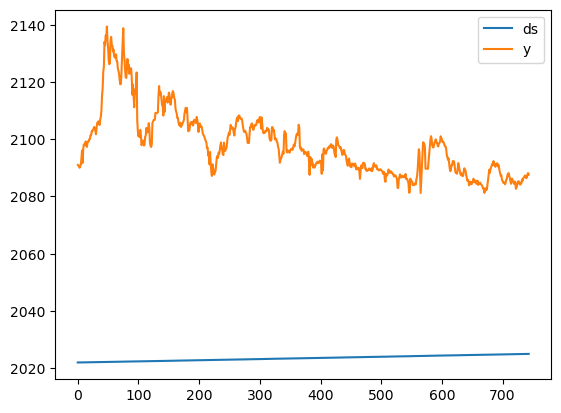

In [23]:
data.plot()
plt.show()

In [24]:
#Facebook Prophet model
from prophet import Prophet
m = Prophet()
model = m.fit(data)

20:15:36 - cmdstanpy - INFO - Chain [1] start processing
20:15:37 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [30]:
future_df = model.make_future_dataframe(periods = 90,freq = 'D')

In [31]:
pred = model.predict(future_df)

In [32]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,44426.929030,42221.013516,46190.518615,44426.929030,44426.929030,-251.185066,-251.185066,-251.185066,-4.856557,-4.856557,-4.856557,-246.328508,-246.328508,-246.328508,0.0,0.0,0.0,44175.743964
1,2022-01-04,44559.250523,42432.398357,46403.929943,44559.250523,44559.250523,-164.876688,-164.876688,-164.876688,39.621808,39.621808,39.621808,-204.498496,-204.498496,-204.498496,0.0,0.0,0.0,44394.373835
2,2022-01-05,44691.572017,42464.263818,46587.480963,44691.572017,44691.572017,-162.380240,-162.380240,-162.380240,-4.828364,-4.828364,-4.828364,-157.551876,-157.551876,-157.551876,0.0,0.0,0.0,44529.191777
3,2022-01-06,44823.893510,42637.195597,46713.500796,44823.893510,44823.893510,-137.984045,-137.984045,-137.984045,-32.675712,-32.675712,-32.675712,-105.308332,-105.308332,-105.308332,0.0,0.0,0.0,44685.909465
4,2022-01-07,44956.215004,43010.506190,46954.415611,44956.215004,44956.215004,33.424266,33.424266,33.424266,81.216793,81.216793,81.216793,-47.792527,-47.792527,-47.792527,0.0,0.0,0.0,44989.639270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2025-03-28,42442.226103,41907.811751,47493.152366,40905.736981,43969.034167,2228.319320,2228.319320,2228.319320,81.216793,81.216793,81.216793,2147.102527,2147.102527,2147.102527,0.0,0.0,0.0,44670.545423
830,2025-03-29,42434.663892,41529.921503,46908.647601,40870.357700,43987.095619,1772.175871,1772.175871,1772.175871,-293.385136,-293.385136,-293.385136,2065.561007,2065.561007,2065.561007,0.0,0.0,0.0,44206.839763
831,2025-03-30,42427.101680,42093.865684,47480.789339,40845.884381,44008.527632,2206.973910,2206.973910,2206.973910,214.907168,214.907168,214.907168,1992.066742,1992.066742,1992.066742,0.0,0.0,0.0,44634.075590
832,2025-03-31,42419.539469,41776.777171,47149.111576,40810.511187,44021.652854,1922.626416,1922.626416,1922.626416,-4.856557,-4.856557,-4.856557,1927.482973,1927.482973,1927.482973,0.0,0.0,0.0,44342.165885


In [33]:
pred[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2022-01-03,42221.013516,46190.518615,44175.743964
1,2022-01-04,42432.398357,46403.929943,44394.373835
2,2022-01-05,42464.263818,46587.480963,44529.191777
3,2022-01-06,42637.195597,46713.500796,44685.909465
4,2022-01-07,43010.506190,46954.415611,44989.639270
...,...,...,...,...
829,2025-03-28,41907.811751,47493.152366,44670.545423
830,2025-03-29,41529.921503,46908.647601,44206.839763
831,2025-03-30,42093.865684,47480.789339,44634.075590
832,2025-03-31,41776.777171,47149.111576,44342.165885


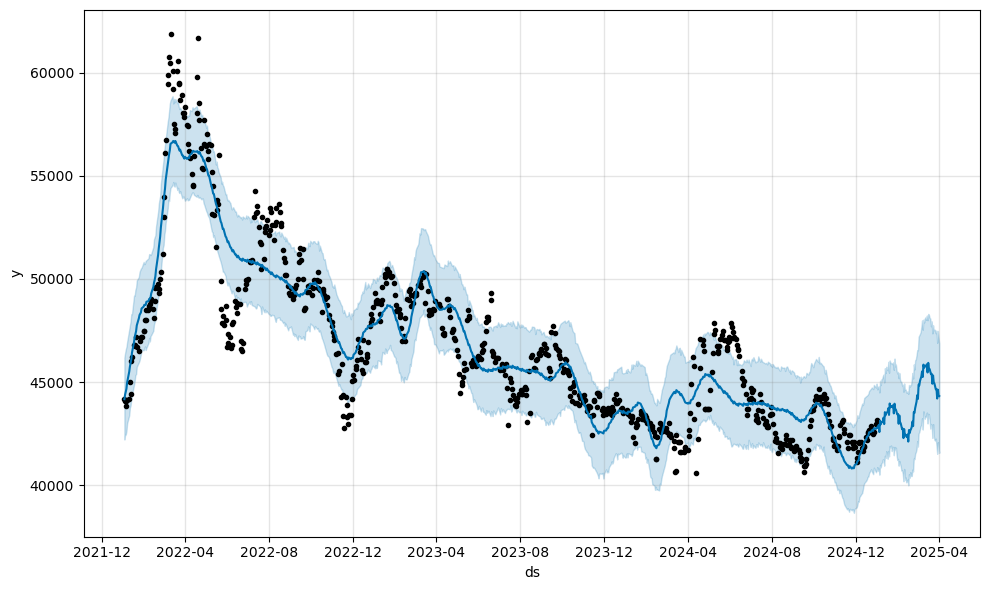

In [34]:
model.plot(pred)
plt.show()

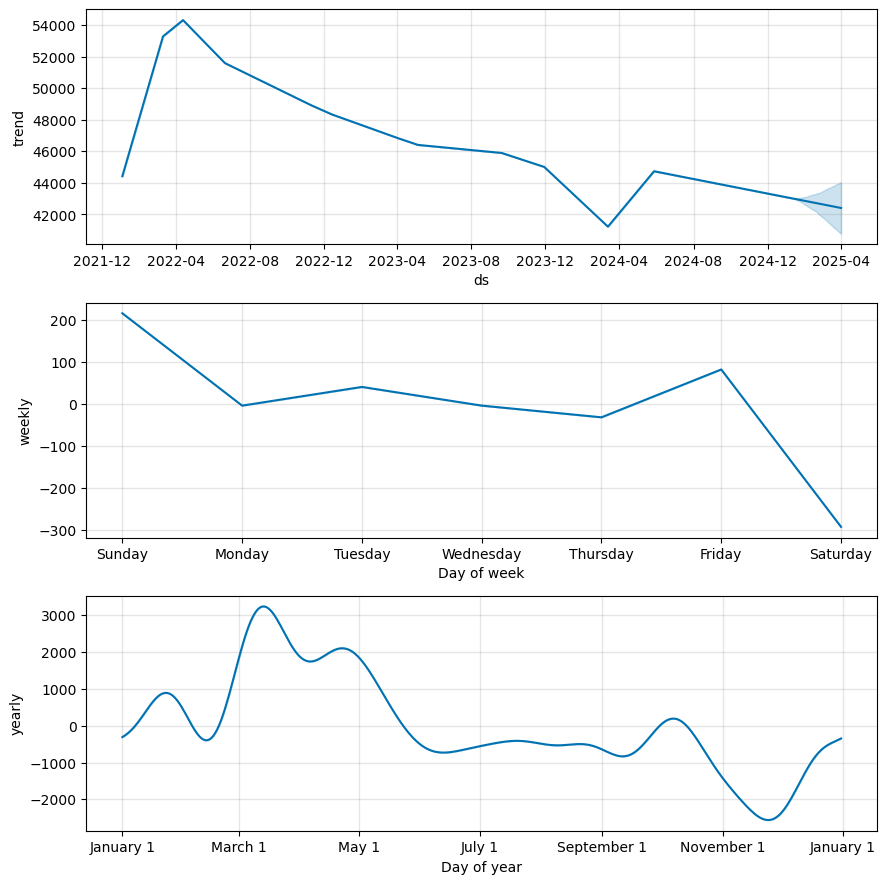

In [36]:
model.plot_components(pred)
plt.show()

In [37]:
from prophet.diagnostics import cross_validation

In [40]:
df_cv = cross_validation(model,period = '60 days',horizon = '15 days',initial = 500)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/18 [00:00<?, ?it/s]

20:45:00 - cmdstanpy - INFO - Chain [1] start processing
20:45:00 - cmdstanpy - INFO - Chain [1] done processing
20:45:01 - cmdstanpy - INFO - Chain [1] start processing
20:45:01 - cmdstanpy - INFO - Chain [1] done processing
20:45:01 - cmdstanpy - INFO - Chain [1] start processing
20:45:01 - cmdstanpy - INFO - Chain [1] done processing
20:45:01 - cmdstanpy - INFO - Chain [1] start processing
20:45:01 - cmdstanpy - INFO - Chain [1] done processing
20:45:01 - cmdstanpy - INFO - Chain [1] start processing
20:45:01 - cmdstanpy - INFO - Chain [1] done processing
20:45:02 - cmdstanpy - INFO - Chain [1] start processing
20:45:02 - cmdstanpy - INFO - Chain [1] done processing
20:45:02 - cmdstanpy - INFO - Chain [1] start processing
20:45:02 - cmdstanpy - INFO - Chain [1] done processing
20:45:02 - cmdstanpy - INFO - Chain [1] start processing
20:45:02 - cmdstanpy - INFO - Chain [1] done processing
20:45:02 - cmdstanpy - INFO - Chain [1] start processing
20:45:02 - cmdstanpy - INFO - Chain [1]

In [41]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-04,59040.946623,58648.744933,59423.229177,56710,2022-03-03
1,2022-03-07,73689.744868,73253.563794,74096.772912,59900,2022-03-03
2,2022-03-08,81890.342164,81495.713896,82279.828046,59460,2022-03-03
3,2022-03-09,92161.436010,91780.560992,92582.312444,60730,2022-03-03
4,2022-03-10,104619.106452,104227.571259,104989.229077,60480,2022-03-03
...,...,...,...,...,...,...
180,2024-12-26,42873.205472,40608.461362,44915.064005,42510,2024-12-17
181,2024-12-27,43015.497114,40882.257604,45181.088123,42600,2024-12-17
182,2024-12-30,42988.022155,41012.184052,45104.507955,42980,2024-12-17
183,2024-12-31,43057.523796,40883.332006,45013.243544,43170,2024-12-17


In [42]:
from prophet.diagnostics import performance_metrics

In [43]:
perf = performance_metrics(df_cv)
perf

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,7.500843e+06,2738.766672,1888.913648,0.038682,0.023966,0.038162,0.583333
1,3 days,1.567617e+07,3959.313840,2482.246151,0.049907,0.051306,0.048347,0.489899
2,4 days,4.662795e+07,6828.466241,4243.472569,0.081942,0.056940,0.075979,0.305556
3,5 days,5.222521e+07,7226.700873,4169.830792,0.079617,0.055184,0.073111,0.361111
4,6 days,7.297690e+07,8542.651781,3955.536416,0.073587,0.022590,0.065388,0.560185
5,7 days,3.877028e+08,19690.170572,8713.709106,0.158071,0.030192,0.119015,0.470085
6,8 days,8.337450e+08,28874.642738,13122.613286,0.236512,0.049979,0.160071,0.309524
7,9 days,1.271385e+09,35656.489315,13849.449063,0.260094,0.059462,0.153069,0.375000
8,10 days,2.001079e+09,44733.416414,16338.428556,0.310323,0.068136,0.164921,0.343434
9,11 days,3.870493e+09,62213.287713,25782.613750,0.475327,0.082342,0.227574,0.242424


In [45]:
from prophet.plot import plot_cross_validation_metric

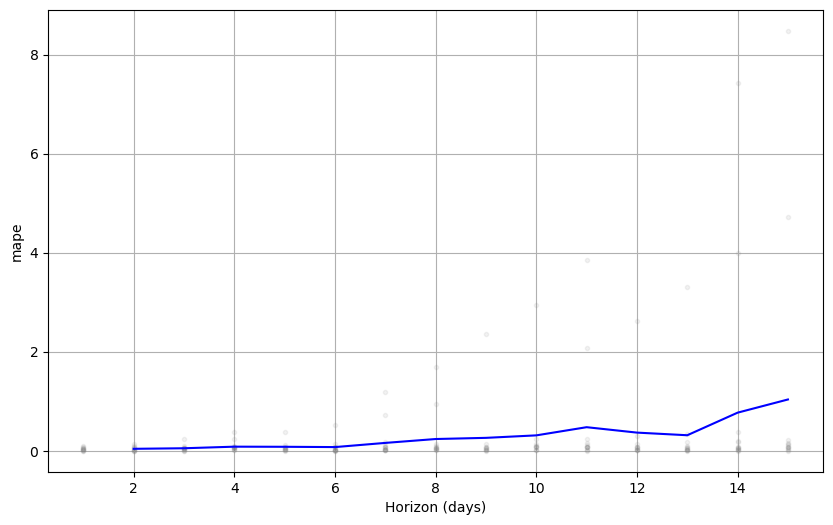

In [46]:
plot_cross_validation_metric(df_cv,metric = 'mape')
plt.show()

In [47]:
pred.to_csv('Steel Price Prediction.csv')

In [48]:
df_cv.to_csv('Cross validation of model.csv')